In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download("https://www.kaggle.com/competitions/life-expectancy")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nastyyyy
Your Kaggle Key: ··········


100%|██████████| 117k/117k [00:00<00:00, 39.1MB/s]


Extracting archive ./life-expectancy/life-expectancy.zip to ./life-expectancy


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv("/content/life-expectancy/Life_train.csv")  #загрузка train-df для обучения модели
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2005,44.6,717.0,28,4.14,8.717409,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2485,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2486,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2487,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2489 non-null   int64  
 1   Life expectancy                  2489 non-null   float64
 2   Adult Mortality                  2489 non-null   float64
 3   infant deaths                    2489 non-null   int64  
 4   Alcohol                          2322 non-null   float64
 5   percentage expenditure           2489 non-null   float64
 6   Hepatitis B                      2009 non-null   float64
 7   Measles                          2489 non-null   int64  
 8    BMI                             2461 non-null   float64
 9   under-five deaths                2489 non-null   int64  
 10  Polio                            2471 non-null   float64
 11  Total expenditure                2293 non-null   float64
 12  Diphtheria          

<Axes: >

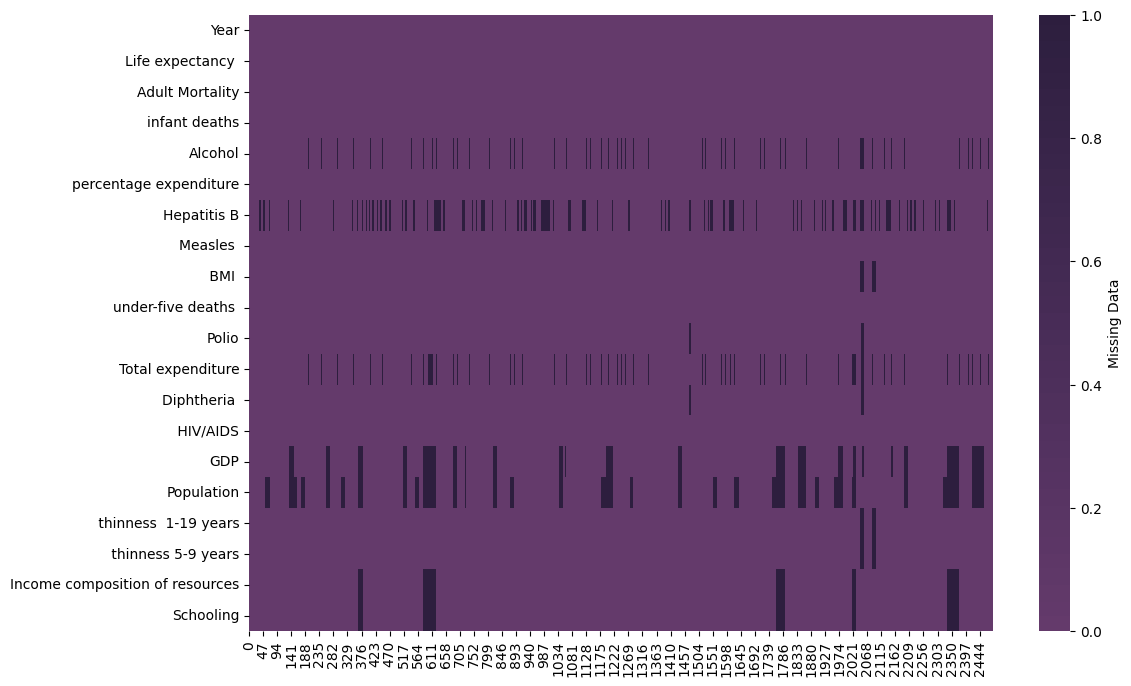

In [ ]:
plt.figure(figsize=(12,8))

cmap = sns.cubehelix_palette(as_cmap=True, light=.3)
sns.heatmap(df.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})
#просмотр (анализ) колонок, где имеются пропуски

In [ ]:
df_nan = df.loc[:, df.isnull().any()]  #df из колонок, где содержится хотя бы один пропуск
df_nan

,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.01,62.0,18.6,58.0,8.18,62.0,612.696514,327582.0,17.5,17.5,0.476,10.0
1,0.01,64.0,18.1,62.0,8.13,64.0,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,0.01,67.0,17.6,67.0,8.52,67.0,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,0.01,68.0,17.2,68.0,7.87,68.0,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,0.01,66.0,16.7,66.0,9.20,66.0,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2484,4.14,65.0,27.5,69.0,6.44,68.0,444.765750,129432.0,9.0,9.0,0.406,9.3
2485,4.36,68.0,27.1,67.0,7.13,65.0,454.366654,12777511.0,9.4,9.4,0.407,9.2
2486,4.06,7.0,26.7,7.0,6.52,68.0,453.351155,12633897.0,9.8,9.9,0.418,9.5
2487,4.43,73.0,26.3,73.0,6.53,71.0,57.348340,125525.0,1.2,1.3,0.427,10.0


In [ ]:
df_nan.isnull().sum() / len(df_nan) * 100  #Значит выбираем стратегию заполнения пропусков, потому что нету колонок, где более 80% пропусков

,0
Alcohol,6.709522
Hepatitis B,19.284853
BMI,1.124950
Polio,0.723182
Total expenditure,7.874648
Diphtheria,0.723182
GDP,15.508236
Population,22.257935
thinness 1-19 years,1.124950
thinness 5-9 years,1.124950


In [ ]:
#for col in df.columns:
  #df[col].fillna(df[col].mode()[0], inplace=True)  #Заполнение колонок с пропусками модами каждой соответствующей колонки
  #df.fillna({col: df[col].mode()[0]}, inplace=True)  #Данный вариант был предложен компилятором - отсутсвие предупреждений

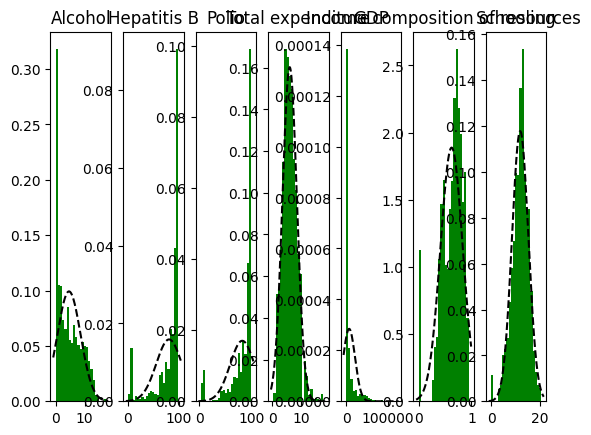

In [ ]:
keys = ['Alcohol', 'Hepatitis B', 'Polio', 'Total expenditure', 'GDP', 'Income composition of resources', 'Schooling']

fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches = (20 * len(keys), 6)
axes = axes.flatten()

for key, ax in zip(keys, axes):
  ax.hist(df[key], density=True, bins=23, color='green')

  loc = df[key].mean()
  scale = df[key].std()

  x_left, x_right = ax.get_xlim()
  x = np.linspace(x_left, x_right, 10000)
  y = stats.norm.pdf(x, loc=loc, scale=scale)

  ax.plot(x, y, linestyle = 'dashed', color='black')
  ax.set_title(key)

In [ ]:
for col in df.columns:
  #df[col].fillna(df[col].mode()[0], inplace=True)  #Заполнение колонок с пропусками модами каждой соответствующей колонки
  df.fillna({col: df[col].mean()}, inplace=True)  #Данный вариант был предложен компилятором - отсутсвие предупреждений

In [ ]:
df.isnull().sum() #Итоговая проверка на наличие пропусков

,0
Year,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0


In [ ]:
df.describe()  #Просмотр показателей обработанных данных

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2.489000e+03,2489.000000,2489.000000,2489.000000,2489.000000
mean,2007.453998,69.135677,165.517075,31.925271,4.600060,719.997905,80.884520,2508.917638,38.197887,44.378063,82.441926,5.952891,82.095508,1.777581,7320.511081,1.267212e+07,4.837424,4.882974,0.625210,11.932864
std,4.593657,9.626188,125.091120,122.898636,3.884299,1968.953987,22.558349,11795.371317,19.807530,167.571112,23.339100,2.389415,23.861550,5.184826,12889.588550,5.318866e+07,4.410935,4.520630,0.205007,3.286925
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,4.100000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,1.110000,4.344931,80.884520,0.000000,19.400000,0.000000,78.000000,4.380000,78.000000,0.100000,575.316640,4.352620e+05,1.600000,1.600000,0.498000,10.200000
50%,2007.000000,72.100000,144.000000,3.000000,4.170000,64.605901,87.000000,15.000000,42.800000,4.000000,93.000000,5.952891,92.000000,0.100000,3113.486350,3.688865e+06,3.400000,3.400000,0.659000,12.100000
75%,2011.000000,75.700000,228.000000,23.000000,7.380000,431.545247,96.000000,357.000000,56.100000,29.000000,97.000000,7.340000,97.000000,0.800000,7320.511081,1.267212e+07,7.100000,7.200000,0.772000,14.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.600000


-----------------------------

In [ ]:
x = df.drop('Life expectancy ', axis=1) #удаление указанного столбца
y = df['Life expectancy ']

In [ ]:
x #df только с показателями здоровья

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2005,717.0,28,4.14,8.717409,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2485,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2486,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2487,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [ ]:
y #серия с продолжительностью жизни (эталонной)

,Life expectancy
0,59.9
1,59.9
2,59.5
3,59.2
4,58.8
...,...
2484,44.6
2485,44.3
2486,44.5
2487,44.8


In [ ]:
print(f'Features size: {x.shape}')
print(f'Target size: {y.shape}')  #Удостоверимся в том, что размер эталонного вектора и кол-во строк с показателями здоровья совпадают

Features size: (2489, 19)
Target size: (2489,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()  #Произведём масштабирование данных с помощью стандартизации (вычитание матожидания плюс деление на ско)

x_std = std.fit_transform(x)

x_std = pd.DataFrame(x_std, columns=x.columns)
x_std.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2.489000e+03,2.489000e+03,2.489000e+03,2489.000000,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2.489000e+03,2489.000000,2.489000e+03,2.489000e+03
mean,-1.771361e-15,-1.056251e-16,1.712839e-17,0.000000,3.996624e-17,8.564195e-17,1.427366e-17,1.484461e-16,2.854732e-17,1.541555e-16,4.453382e-16,3.282942e-17,3.425678e-17,-3.140205e-17,8.564195e-18,4.853044e-17,0.000000,-9.991561e-17,-7.993249e-17
std,1.000201e+00,1.000201e+00,1.000201e+00,1.000201,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201,1.000201e+00,1.000201e+00
min,-1.622998e+00,-1.315442e+00,-2.598213e-01,-1.181933,-3.657488e-01,-3.541951e+00,-2.127463e-01,-1.878344e+00,-2.648844e-01,-3.404497e+00,-2.336979e+00,-3.357351e+00,-3.236210e-01,-5.679235e-01,-2.382956e-01,-1.074234e+00,-1.058245,-3.050320e+00,-3.631133e+00
25%,-9.697923e-01,-7.317503e-01,-2.598213e-01,-0.898685,-3.635416e-01,0.000000e+00,-2.127463e-01,-9.492180e-01,-2.648844e-01,-1.903595e-01,-6.584070e-01,-1.716708e-01,-3.236210e-01,-5.234108e-01,-2.301113e-01,-7.341015e-01,-0.726366,-6.206414e-01,-5.273050e-01
50%,-9.885128e-02,-1.720458e-01,-2.354061e-01,-0.110740,-3.329299e-01,2.711506e-01,-2.114744e-01,2.323883e-01,-2.410092e-01,4.524680e-01,3.717885e-16,4.151651e-01,-3.236210e-01,-3.264550e-01,-1.689281e-01,-3.259428e-01,-0.328112,1.648572e-01,5.085900e-02
75%,7.720897e-01,4.995997e-01,-7.263762e-02,0.715830,-1.465299e-01,6.701961e-01,-1.824741e-01,9.039850e-01,-9.178881e-02,6.238886e-01,5.806389e-01,6.247493e-01,-1.885845e-01,0.000000e+00,3.502663e-17,5.130501e-01,0.512648,7.161698e-01,6.290230e-01
max,1.643031e+00,4.457510e+00,1.438934e+01,3.272790,9.529772e+00,8.032113e-01,1.777953e+01,1.989649e+00,1.465715e+01,7.095990e-01,4.875440e+00,7.085830e-01,9.418296e+00,8.679463e+00,2.409244e+01,5.184200e+00,5.247452,1.574851e+00,2.637382e+00


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Test dataset size: {x_test.shape}, {y_test.shape}')

Train dataset size: (2115, 19), (2115,)
Test dataset size: (374, 19), (374,)


In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(x_test, y_test))

MAE 2.9905352841206154
MSE 15.71563886908622
R2 Score: 0.8387234281957126


Получили такие показатели при обучении на части train и тренировке на части test тренировочного датасета

Теперь обучим модель на всём тренировочном датасете

In [ ]:
model = LinearRegression()

model.fit(x_std, y)

LinearRegression()

Предскажем весктор возроста, используя данные test-датасета, где будем использовать аналогичную обработку данных

In [ ]:
df_test = pd.read_csv("/content/life-expectancy/Life_test.csv")
df_test

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2005,116.0,0,11.59,167.231990,NaN,2,57.5,0,96.0,6.89,96.0,0.1,1224.245900,4442.0,1.8,1.8,0.777,13.6
1,2011,139.0,2,9.10,10.325889,96.0,4189,57.7,2,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7
2,2003,126.0,1,5.52,58.459760,98.0,0,48.6,2,95.0,7.60,98.0,0.1,4267.135780,329174.0,2.2,2.2,0.728,12.8
3,2008,295.0,237,2.09,0.000000,65.0,12461,18.2,324,64.0,4.46,65.0,1.8,NaN,NaN,1.8,1.7,NaN,NaN
4,2010,178.0,23,0.24,84.623025,82.0,190,16.4,30,83.0,6.43,82.0,0.2,592.183522,2723137.0,16.7,17.2,0.515,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2012,257.0,39,0.01,151.899429,92.0,1613,26.7,56,91.0,4.79,92.0,0.9,1629.822200,2573349.0,6.7,6.6,0.563,11.2
435,2011,144.0,12,4.37,184.307362,85.0,6,55.0,14,85.0,6.64,85.0,0.1,7227.739680,4646646.0,2.2,2.0,0.700,13.0
436,2012,13.0,1,7.71,158.257602,92.0,31,53.6,1,93.0,8.57,92.0,0.1,4142.869175,3825.0,2.6,2.8,0.749,13.4
437,2010,57.0,0,10.01,2198.590865,NaN,77,55.4,0,96.0,11.70,95.0,0.1,74276.718420,782499.0,0.5,0.4,0.920,15.4


In [ ]:
for col in df_test.columns:
  df_test.fillna({col: df_test[col].mean()}, inplace=True)

In [ ]:
x = df_test

In [ ]:
std = StandardScaler()  #Произведём масштабирование данных с помощью стандартизации (вычитание матожидания плюс деление на ско)

x_std = std.fit_transform(x)

x_std = pd.DataFrame(x_std, columns=x.columns)
x_std.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,439.000000,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02
mean,-1.312036e-14,4.855645e-17,6.069556e-18,-8.497379e-17,-1.618548e-17,0.000000,8.092742e-18,-3.844052e-17,-4.046371e-18,-1.213911e-17,-1.780403e-16,1.294839e-16,1.922026e-17,-4.855645e-17,1.213911e-17,-1.213911e-16,1.416230e-17,1.011593e-16,6.474193e-16
std,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00
min,-1.652399e+00,-1.335589e+00,-2.546645e-01,-1.148126e+00,-4.059615e-01,-3.547869,-2.064941e-01,-1.814314e+00,-2.620202e-01,-3.433996e+00,-1.972113e+00,-3.626135e+00,-3.301586e-01,-5.799490e-01,-2.296925e-01,-1.118601e+00,-1.115968e+00,-3.113597e+00,-4.077628e+00
25%,-8.007371e-01,-7.585730e-01,-2.546645e-01,-8.836284e-01,-4.020084e-01,0.000000,-2.064941e-01,-9.406977e-01,-2.532018e-01,-9.204929e-02,-6.475483e-01,-1.167932e-01,-3.301586e-01,-5.405053e-01,-2.235121e-01,-7.476880e-01,-7.418465e-01,-4.751011e-01,-5.828286e-01
50%,5.092514e-02,-1.481067e-01,-2.196218e-01,-1.562592e-01,-3.730502e-01,0.295890,-2.038713e-01,2.714142e-01,-2.355651e-01,4.220964e-01,-3.764639e-16,4.231056e-01,-3.301586e-01,-3.770788e-01,-1.715171e-01,-3.535930e-01,-3.443423e-01,1.869570e-01,4.359772e-02
75%,9.025874e-01,5.334413e-01,-3.272775e-02,7.217269e-01,-1.679219e-01,0.653449,-1.626933e-01,8.662699e-01,-5.919761e-02,5.934782e-01,5.986022e-01,6.030718e-01,-2.184948e-01,0.000000e+00,0.000000e+00,5.273252e-01,5.441964e-01,6.640283e-01,6.700240e-01
max,1.541334e+00,4.392759e+00,1.843474e+01,3.225885e+00,8.525575e+00,0.787533,1.282557e+01,1.879267e+00,1.825657e+01,6.791692e-01,3.105738e+00,6.930549e-01,9.049602e+00,5.467719e+00,1.925256e+01,5.163737e+00,5.454542e+00,1.423448e+00,2.747122e+00


In [ ]:
y_res = model.predict(x_std)

In [ ]:
df_res = pd.DataFrame()
df_res['Life expectancy'] = y_res
df_res

,Life expectancy
0,75.466288
1,75.260462
2,73.141747
3,62.207411
4,64.940938
...,...
434,64.541020
435,72.404972
436,76.396060
437,81.710123


In [ ]:
df_res.index.name = 'index'

In [ ]:
df_res.to_csv('output.csv', index=True)